# Linear regression

Suppose we have 100 observations of pairs of data, an *outcome* $y_i$ and an explanatory variable $x_i$. The figure below shows an example of such data.

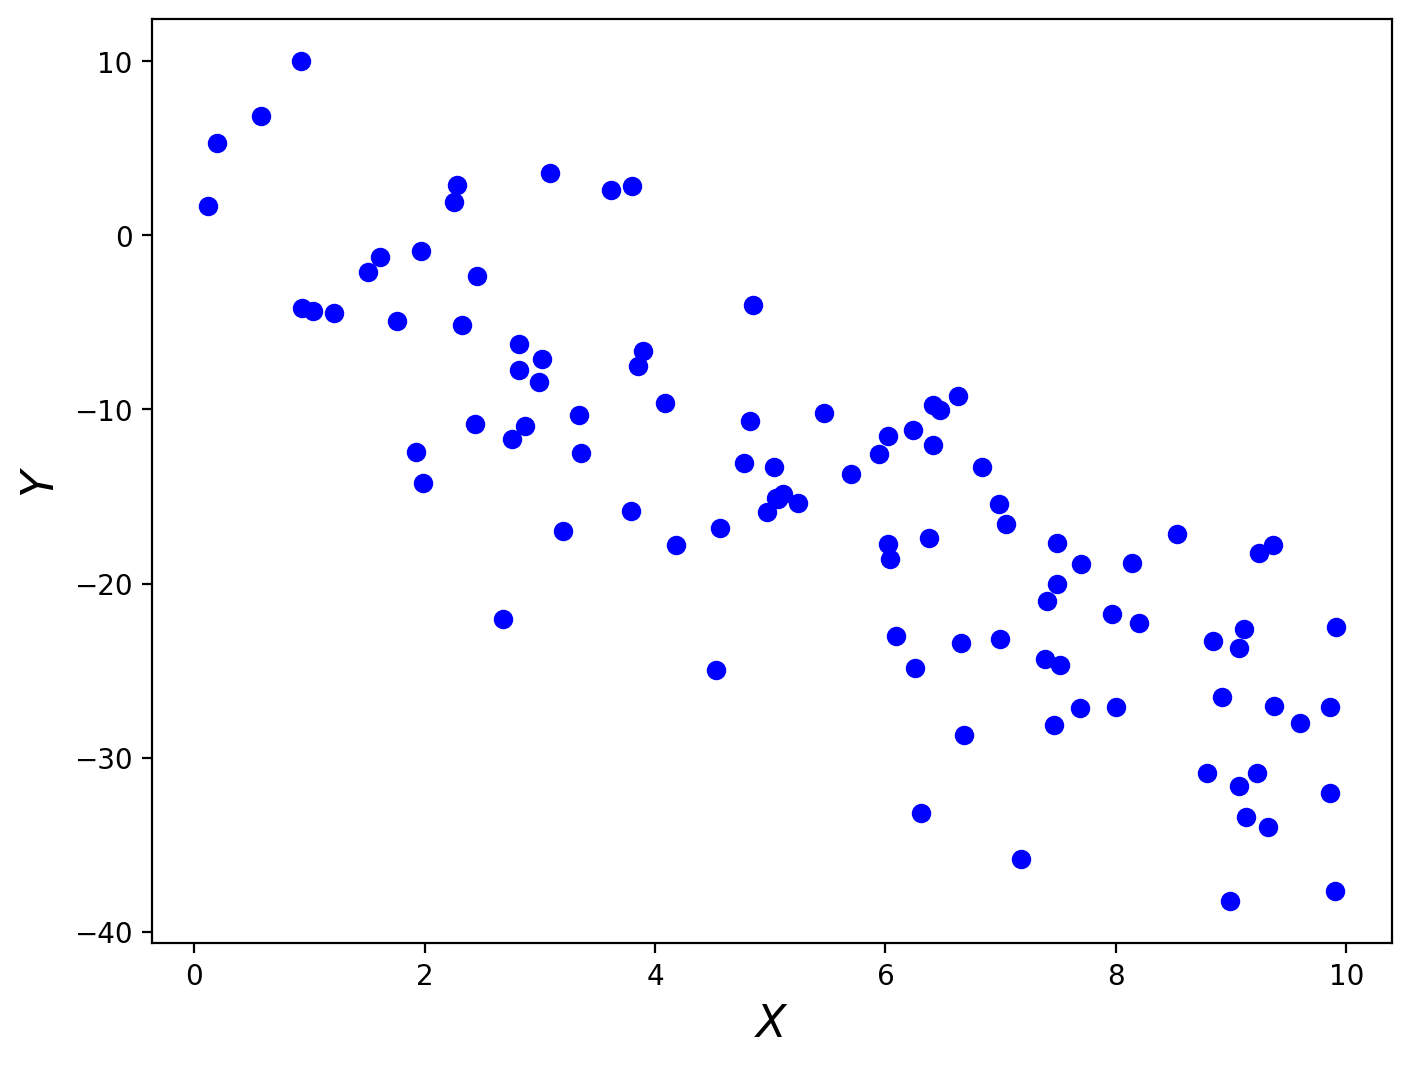

In [2]:
# initiate random number generator
rng = default_rng(8675309)

N = 100
x = rng.uniform(high=10, size=(N,1))
ε = rng.normal(0, 7, size=(N,1))

# use “true” model to generate Y from X
y = 2 - 3*x + ε

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'bo')
ax.set_xlabel('$X$', fontsize=16)
ax.set_ylabel('$Y$', fontsize=16)
plt.show()

Our objective is to understand the relation between $X$ and $Y$. This might be because we're intrinsically interested in how these variables are related, or more generally we may be interested simply in predicting what $y_i$ would be for some new value of $x_i$ that isn't in our data.

One model for how the data might be related is the linear model

$$y_i = \beta_0 + \beta_1 x_i + \varepsilon_i $$

where $\beta_0$ is the *intercept* or *constant*, $\beta_1$ is the slope coefficient, and the *error* or *noise* term $\varepsilon$ is assumed to follow

$$\varepsilon_i \sim \N(0, \sigma^2).$$

That is, each $\varepsilon_i$ is independently and identically (iid) normally distributed with mean zero and variance $\sigma^2$. The coefficients or *parameters* $\beta_0$, $\beta_1$, and $\sigma^2$ must be *estimated* from the data.

The model can be written more compactly using vector notation as

$$Y = X\beta + \varepsilon,$$

where

\begin{equation*}
Y = \begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_N
\end{bmatrix},
\quad
X = \begin{bmatrix}
1 & x_1\\ 
1 & x_2\\ 
\vdots & \vdots \\ 
1 & x_N
\end{bmatrix},
\quad
\varepsilon = \begin{bmatrix}
\varepsilon_1 \\
\varepsilon_2 \\
\vdots \\
\varepsilon_N
\end{bmatrix},
\quad
\text{and}
\quad
\beta = \begin{bmatrix}
\beta_0 \\ \beta_1
\end{bmatrix}.
\end{equation*}

The *design matrix*, $X$, is a $N\times (K+1)$ matrix, where we have $K$ explanatory variables. In this simple case, $K=1$.



In [3]:
#  construct the X matrix
X = np.c_[np.ones(N), x]

X

array([[1.        , 3.78932572],
       [1.        , 8.14510763],
       [1.        , 6.25815208],
       [1.        , 9.06732906],
       [1.        , 1.51201567],
       [1.        , 3.35945273],
       [1.        , 4.77343805],
       [1.        , 5.02944731],
       [1.        , 3.20385337],
       [1.        , 6.98991629],
       [1.        , 0.93549912],
       [1.        , 9.60145739],
       [1.        , 2.82288409],
       [1.        , 6.23623746],
       [1.        , 9.22986082],
       [1.        , 9.36331049],
       [1.        , 0.19613871],
       [1.        , 2.45358141],
       [1.        , 4.85431758],
       [1.        , 9.11233189],
       [1.        , 3.09033301],
       [1.        , 5.70593544],
       [1.        , 8.0015214 ],
       [1.        , 6.9984128 ],
       [1.        , 5.10762591],
       [1.        , 3.33947923],
       [1.        , 2.32362688],
       [1.        , 7.40113077],
       [1.        , 9.90912306],
       [1.        , 7.46814805],
       [1.

Given a particular estimate of $\beta$, which we denote $\hat{\beta}$, we *predict* values for $Y$ using

$$\hat{Y} = X\hat{\beta}.$$

It looks from the plot that there's a clear negative relation between $X$ and $Y$ for these data, so let's guess that $\beta = \begin{pmatrix} 0\\ -1.5 \end{pmatrix}$.

In [4]:
β_hat = np.array([[0], [-1.5]])
y_hat = X @ β_hat

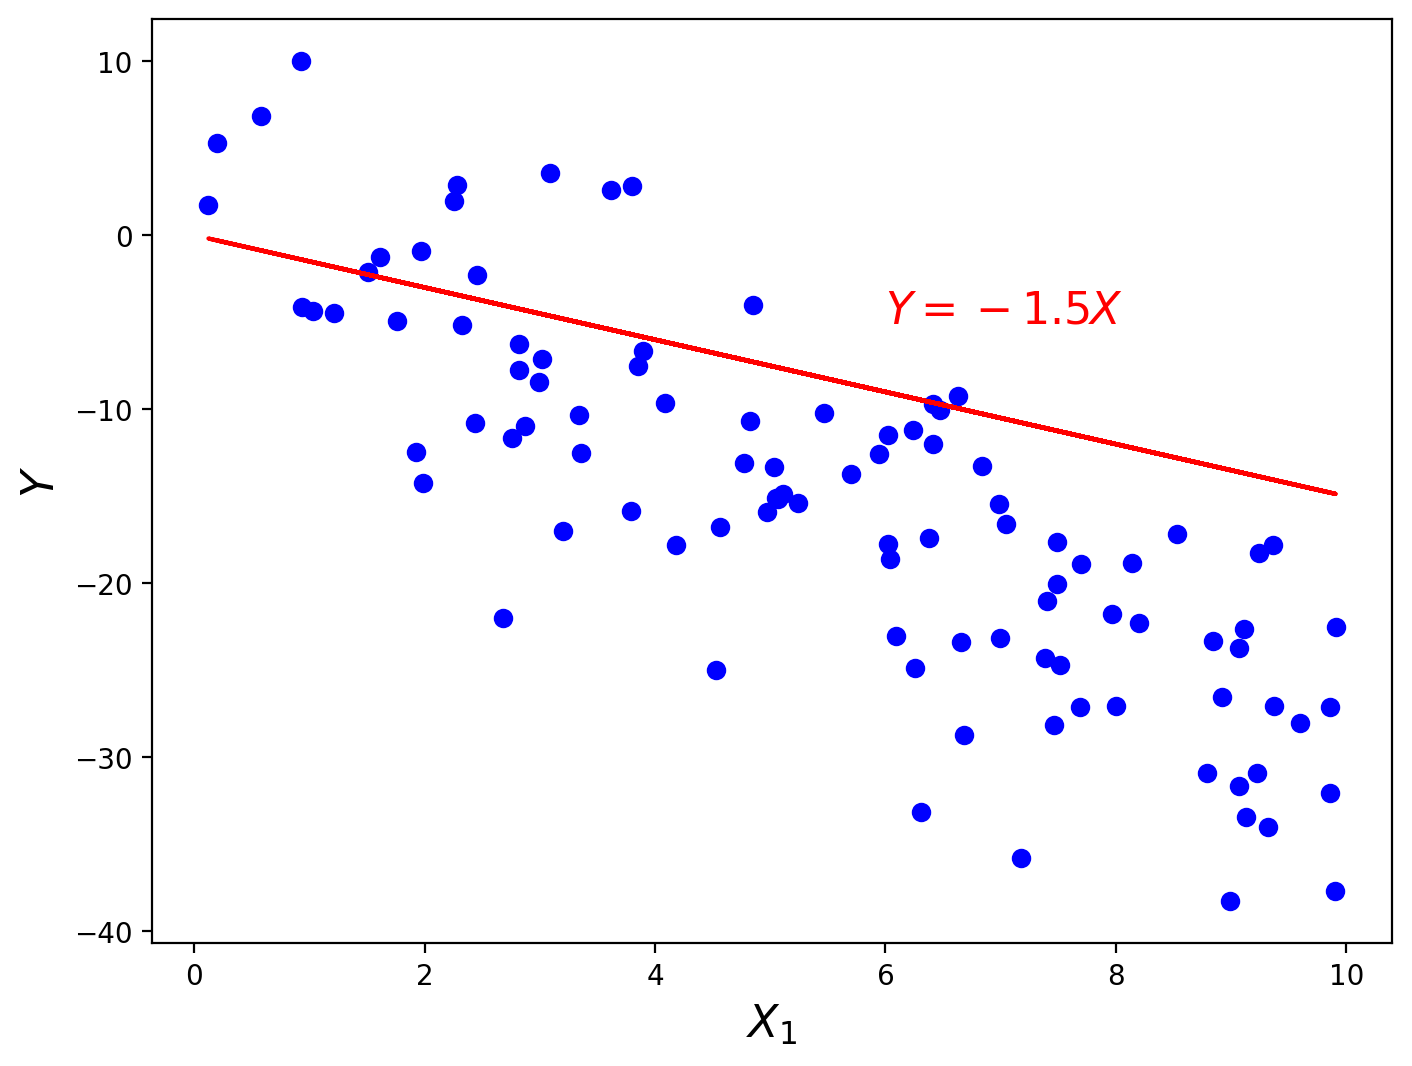

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'bo')
ax.plot(x, y_hat, '-r')
ax.set_xlabel('$X_1$', fontsize=16)
ax.set_ylabel('$Y$', fontsize=16)
ax.text(6, -5, '$Y=-1.5 X$', fontsize=16, color='r')
plt.show()

This model doesn't look like it's doing a great job of fitting the data. It seems like it's not quite steep enough. Rather than merely guessing coefficients, though, let's find a more systematic approach to estimating coefficients.

We want to choose parameters that are in some sense "good". One way to do this is choose parameters that make the *prediction error*,

$$\hat{\varepsilon}_i = y_i - \hat{y}_i,$$

as small as possible.

In [6]:
ε_hat = y - y_hat

Using our current (not very good) guess of the value of $\beta$, these are:

In [7]:
import pandas as pd
pd.options.display.max_rows = 100

df = pd.DataFrame(np.c_[x, y, y_hat, ε_hat])
df.columns = ['x', 'y', 'y_hat', 'ε_hat']
df.index = np.arange(1,101)
df.style.format('{:.2f}')

,x,y,y_hat,ε_hat
1,3.79,-15.84,-5.68,-10.16
2,8.15,-18.84,-12.22,-6.63
3,6.26,-24.85,-9.39,-15.46
4,9.07,-31.66,-13.60,-18.06
5,1.51,-2.12,-2.27,0.15
6,3.36,-12.51,-5.04,-7.47
7,4.77,-13.10,-7.16,-5.94
8,5.03,-13.29,-7.54,-5.74
9,3.20,-16.98,-4.81,-12.17
10,6.99,-15.46,-10.48,-4.97


Looking at the histogram for all 100 error terms, we see that the average error is about –3, and some errors are quite large in absolute terms. If we're more strategic about choosing a better estimate of $\hat\beta$ we should be able to make these errors smaller.

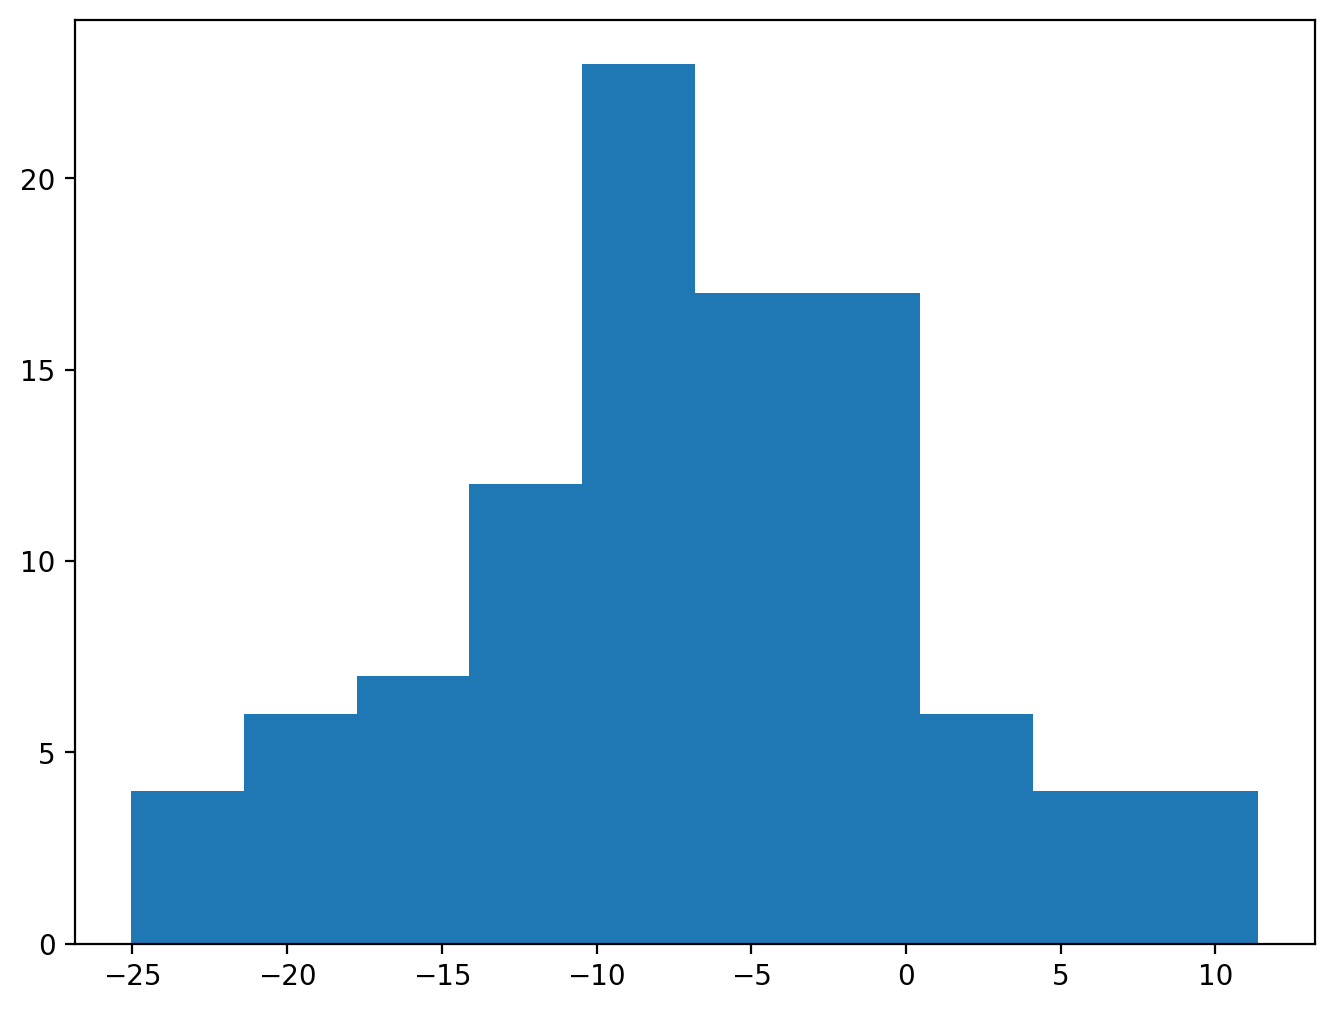

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(ε_hat)
plt.show()

To minimize the errors, it is helpful to summarize the errors is with the Mean Squared Error,

$$MSE := \frac{1}{N} \sum_i \varepsilon_i^2 = \frac{1}{N} \sum_i (y_i-\hat{y}_i)^2.$$

In [9]:
(ε_hat**2).mean()

110.76764360488218

In vector notation, this is just

$$\frac{\hat\varepsilon'\hat\varepsilon}{N} = \frac{1}{N}(Y-X\hat\beta)'(Y-X\hat\beta).$$

In [10]:
ε_hat.T @ ε_hat / N

array([[110.7676436]])

The MSE is a function of the $\hat\beta$ estimates: as we change our guess for the true values of $\beta$, we generate a new set of error terms, and therefore a new mean squared error.

In [11]:
def MSE(β_hat):
    β_hat = np.array(β_hat).reshape(2,1)
    ε = y - X @ β_hat
    return (ε.T @ ε).item() / N

Given this function, we can try some different values for $\hat \beta$.

In [12]:
MSE(β_hat)

110.76764360488214

In [13]:
MSE([1, -1.5])

126.15092703695535

In [14]:
MSE([2, -2])

89.6405313433802

We want to find the values of $\hat\beta_0$ and $\beta_1$ that minimize this function. First, let's set $\hat{\beta}_0=0$ and see how MSE varies as $\hat\beta_1$ changes.

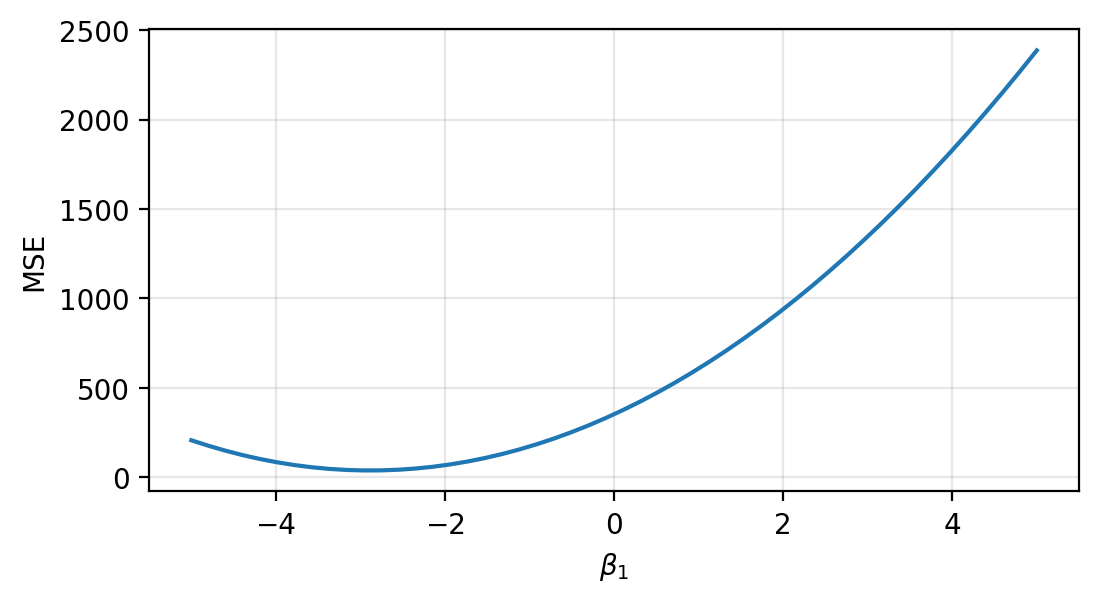

In [15]:
β0 = 0
β1 = np.linspace(-5,5,50)

fig, ax = plt.subplots(figsize=(6,3))
ax.plot(β1, [(MSE([β0,k])) for k in β1])
ax.set_ylabel('MSE')
ax.set_xlabel(r'$\beta_1$')
ax.grid(alpha=0.3)
plt.show()

It looks like the MSE is minimized near $\hat\beta_1=-3$. Let's hold that value fixed and see how MSE varies as we change $\hat\beta_0$.

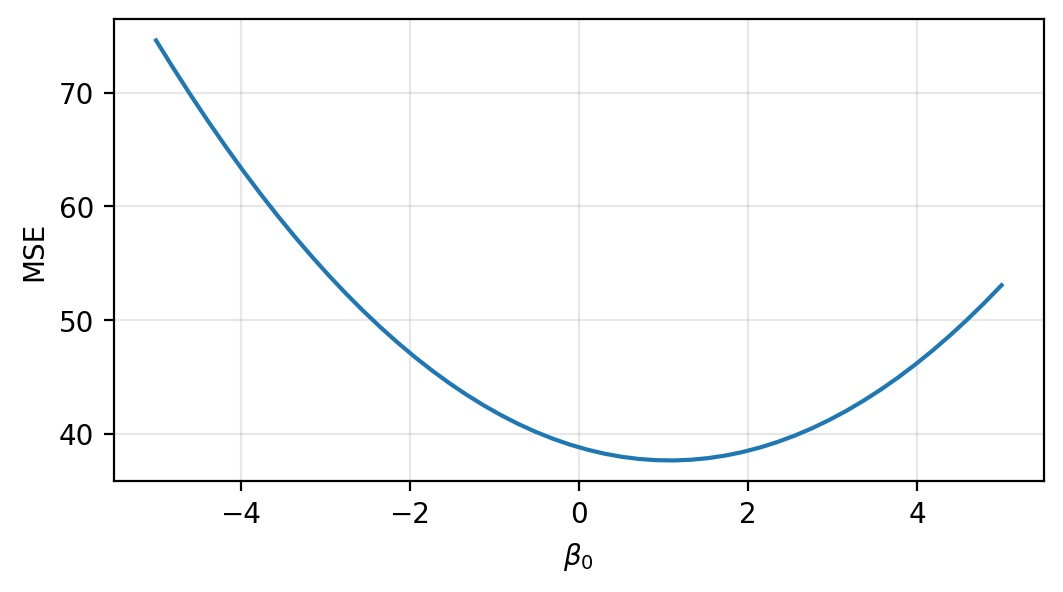

In [16]:
β0 = np.linspace(-5,5,50)
β1 = -3

fig, ax = plt.subplots(figsize=(6,3))
ax.plot(β0, [(MSE([k,β1])) for k in β0])
ax.set_ylabel('MSE')
ax.set_xlabel(r'$\beta_0$')
ax.grid(alpha=0.3)
plt.show()

It looks like a value a little less that $\beta_0=2$ is best. We can do better by varying both $\beta_0$ and $\beta_1$ simultaneously.

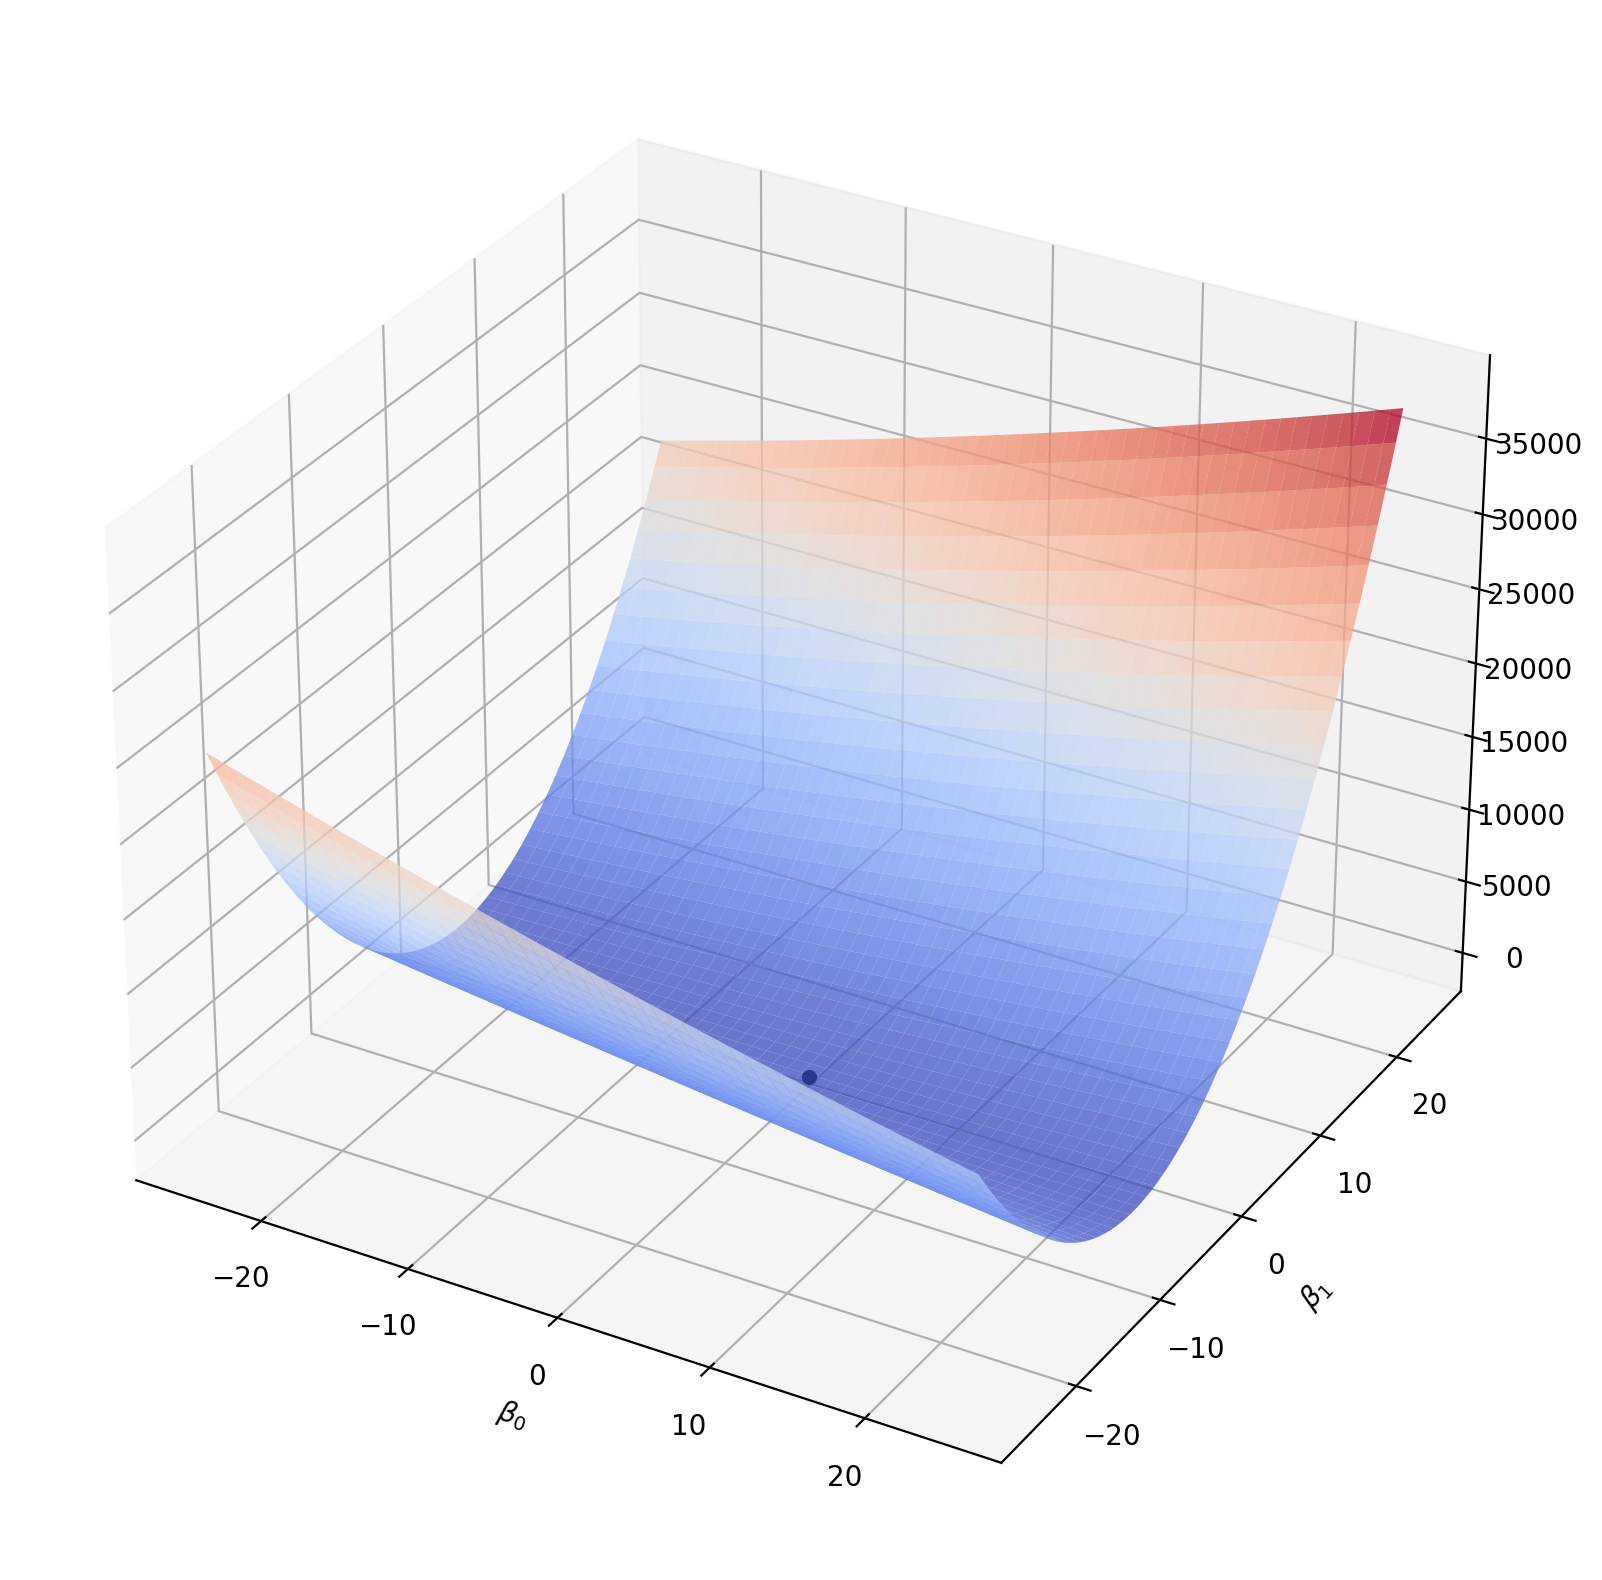

In [17]:
#  calculate MSE on a "grid" of b0,b1 pairs
k = 250
β0 = β1 = np.linspace(-25, 25, k)
β0, β1 = np.meshgrid(β0, β1)

Z = np.zeros_like(β0)

for i in range(k):
    for j in range(k):
        Z[i,j] = MSE([β0[i,j], β1[i,j]])

# 3D plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(β0, β1, Z, cmap=cm.coolwarm, alpha=0.75)
ax.set_xlabel(r'$\beta_0$')
ax.set_ylabel(r'$\beta_1$')

# add minimum point
minidx = np.unravel_index(Z.argmin(), Z.shape)
ax.scatter(β0[minidx], β1[minidx], Z[minidx], color='k')

plt.show()

The point on this grid with the lowest MSE, marked in black, is ({glue:}`b0`, {glue:}`b1`), which yields an MSE of {glue:}`MSE`.

We did manage to find a pretty good estimate, but note that this is really not a good way to find parameters. We had to check blindly if possible parameter values worked well. What if we didn't start looking anywhere near the correct values? Specifically, what if $\beta_0=-523$ and $\beta_1=4367$? Or what if we have ten explanatory variables rather than just one? We might have to search through trillions of combinations before finding a good fit. Surely there's a 
better way to estimate the coefficients!

## Gradient descent

Looking at the MSE function in the figure above, we can see that it is bowl-shaped. (This particular bowl is much steeper in the $\beta_1$ axis than in the $\beta_0$ axis.) This is because the MSE is a sum of squares, so it is a [convex function](https://en.wikipedia.org/wiki/Convex_function). Convex functions are especially easy to minimize using a simple algorithm that uses a little knowledge of calculus to iteratively search in the right direction. In each iteration of the algorithm, we use the derivatives to decide how to improve on our previous guess.

With two parameters, $\beta_0$ and $\beta_1$, the MSE function is

\begin{equation*}
MSE(\beta_0,\beta_1) = \frac{1}{N} \sum_{i=1}^N \left[y_i - (\beta_0 + \beta_1 x_i)\right]^2.
\end{equation*}

The partial derivatives are therefore 

\begin{equation*}
\frac{\partial MSE}{\partial \beta_0} = -\frac{2}{N} \sum_i \left[y_i - (\beta_0 + \beta_1 x_i)\right]
\end{equation*}

and

\begin{equation*}
\frac{\partial MSE}{\partial \beta_1} = -\frac{2}{N} \sum_i x_i \left[y_i - (\beta_0 + \beta_1 x_i)\right].
\end{equation*}

In vector notation, this is
\begin{equation}
\frac{\partial}{\partial \beta} \frac{(y-X\beta)'(y-X\beta)}{N} = -\frac{2}{N} X'(y-X\beta) = \frac{2}{N} X'(X\beta-y).
\end{equation}

This vector is called the *gradient* of the function.

Gradient descent works as follows:

1. Initialize the $\beta$ parameters. This can just be a random guess.

2. Calculate the gradient, $\Delta := \frac{\partial MSE}{\partial \beta}$.

3. Update the coefficient estimate according to

$$\beta \leftarrow  \beta - \eta \cdot \Delta.$$

Steps 2 and 3 are repeated until the process *converges*, meaning that $\beta$ is no longer changing. (Recall that at the minimum of a function, the derivative is zero, so $\Delta$ will just be a vector of zeros.

The parameter $\eta$ is called the *learning rate* and controls how large of a step we take in the direction of the gradient.

In [21]:
β = rng.standard_normal((2,1))  # random initialization

y_hat = X @ β

gradient = -2/N * X.T @ (y - y_hat)

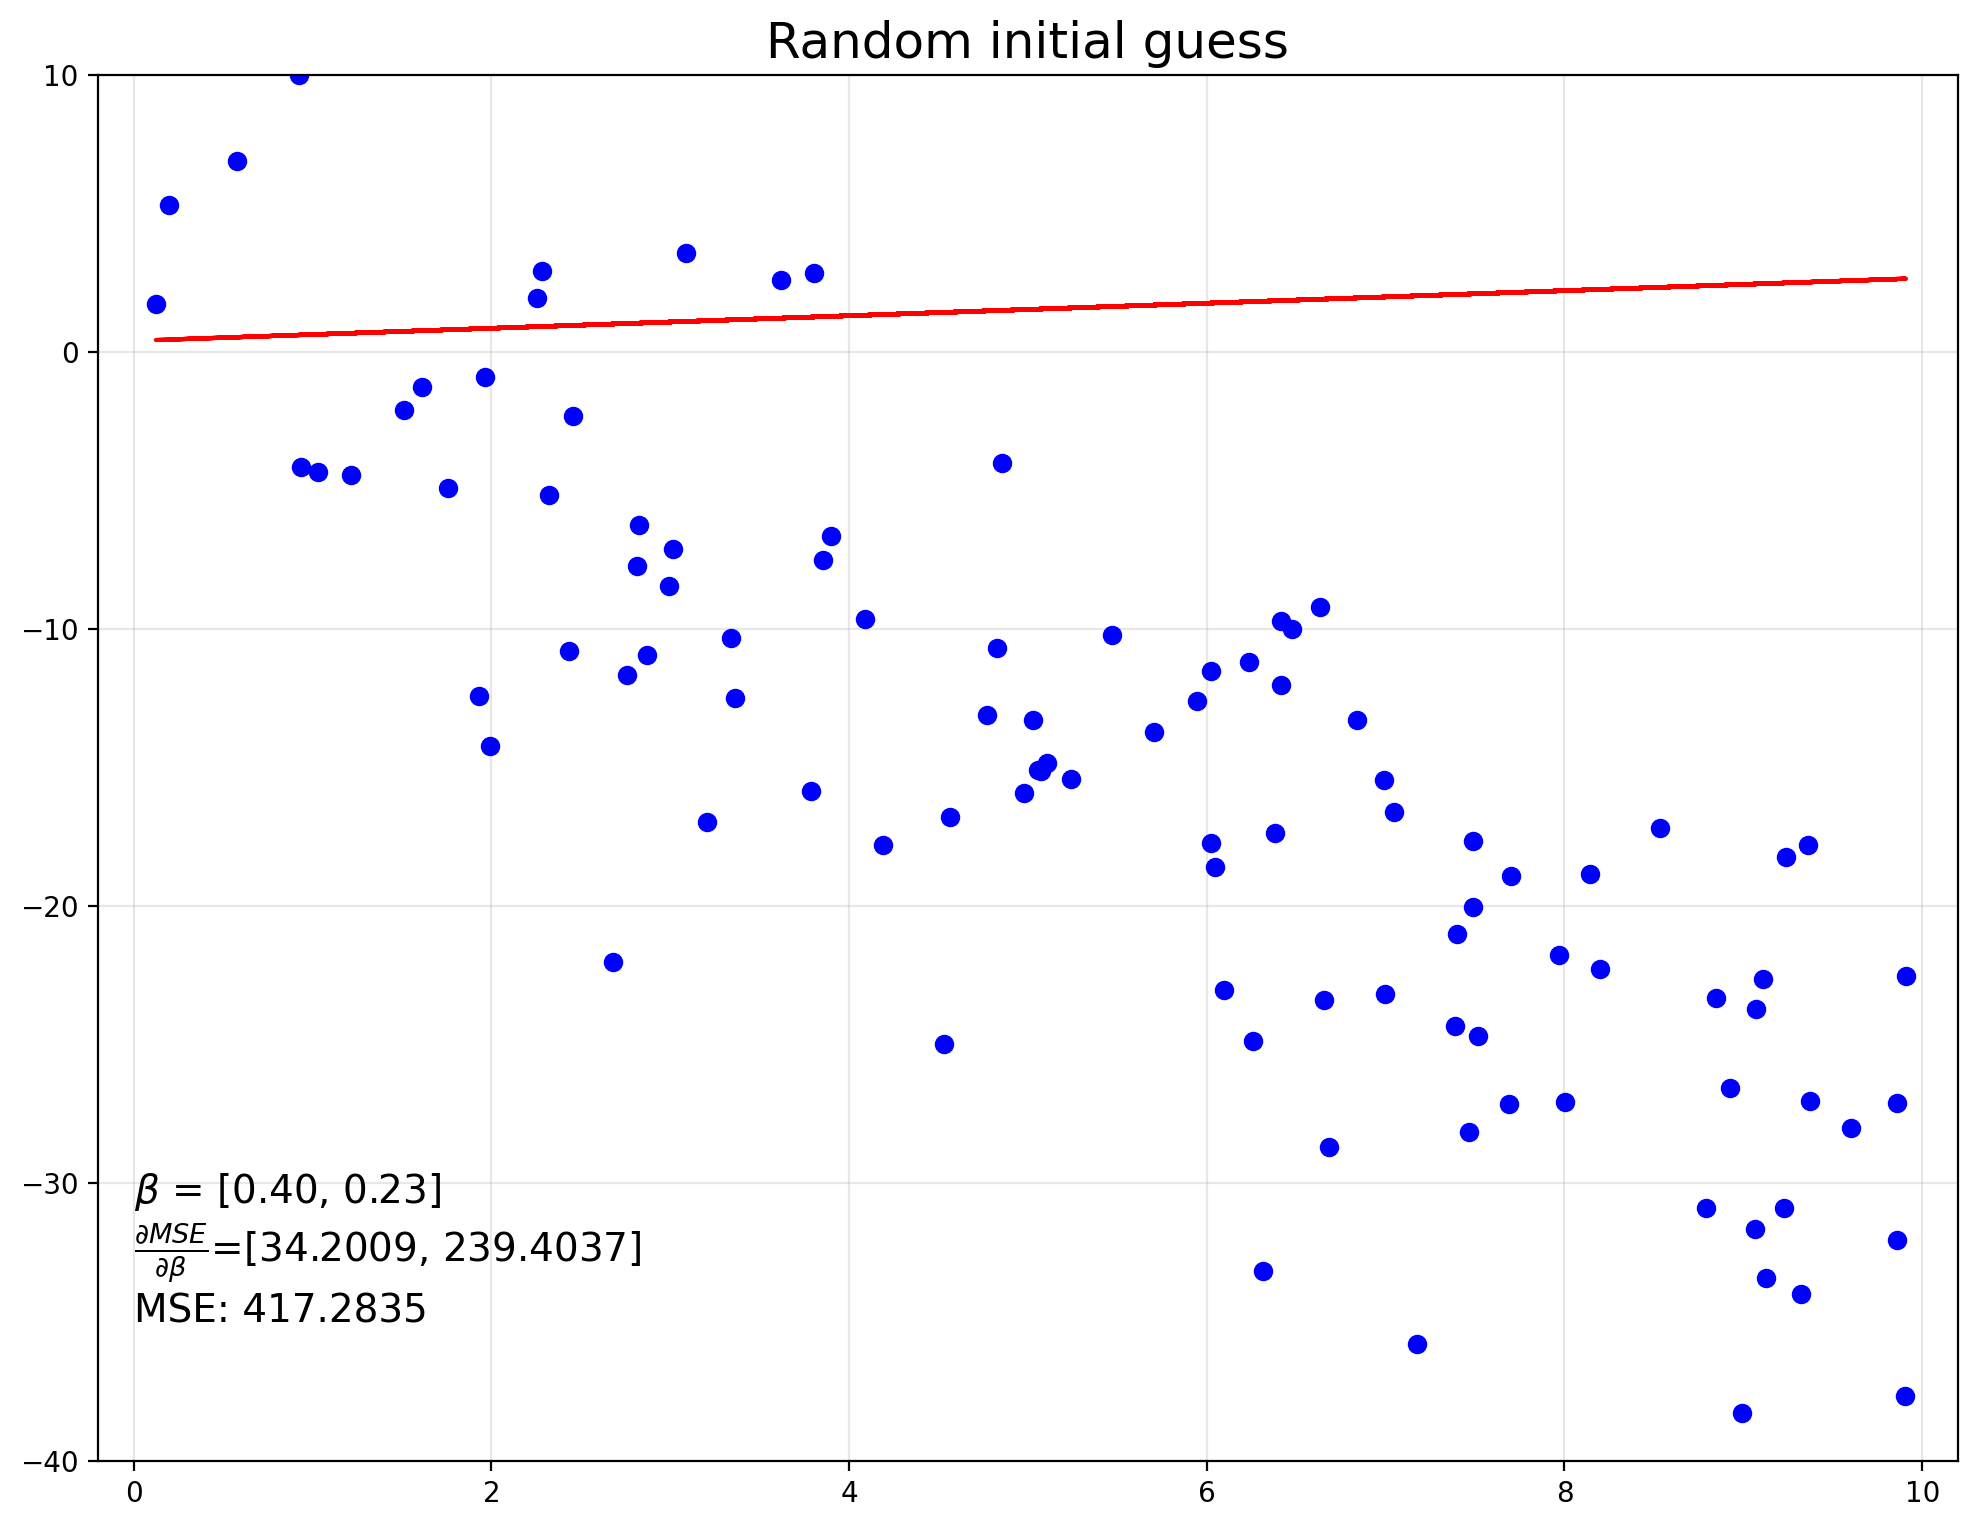

In [23]:
def do_plot(ttl):
    fig, ax = plt.subplots(figsize=(12,9))
    ax.plot(x, y, 'bo')
    ax.plot(x, y_hat, '-r')
    txt_str = ('$\\beta$ = [{:.2f}, {:.2f}]\n'.format(*β.ravel()) 
               + '$\\frac{\\partial MSE}{\\partial \\beta}$=' 
               + '[{:.4f}, {:.4f}]\n'.format(*gradient.ravel())
               + 'MSE: {:.4f}'.format(MSE(β)))
    ax.text(0, -35, txt_str, fontsize=14)
    ax.set_xlim(-0.2, 10.2)
    ax.set_ylim(-40, 10)
    ax.grid(alpha=0.3)
    ax.set_title(ttl, fontsize=18)

do_plot('Random initial guess')

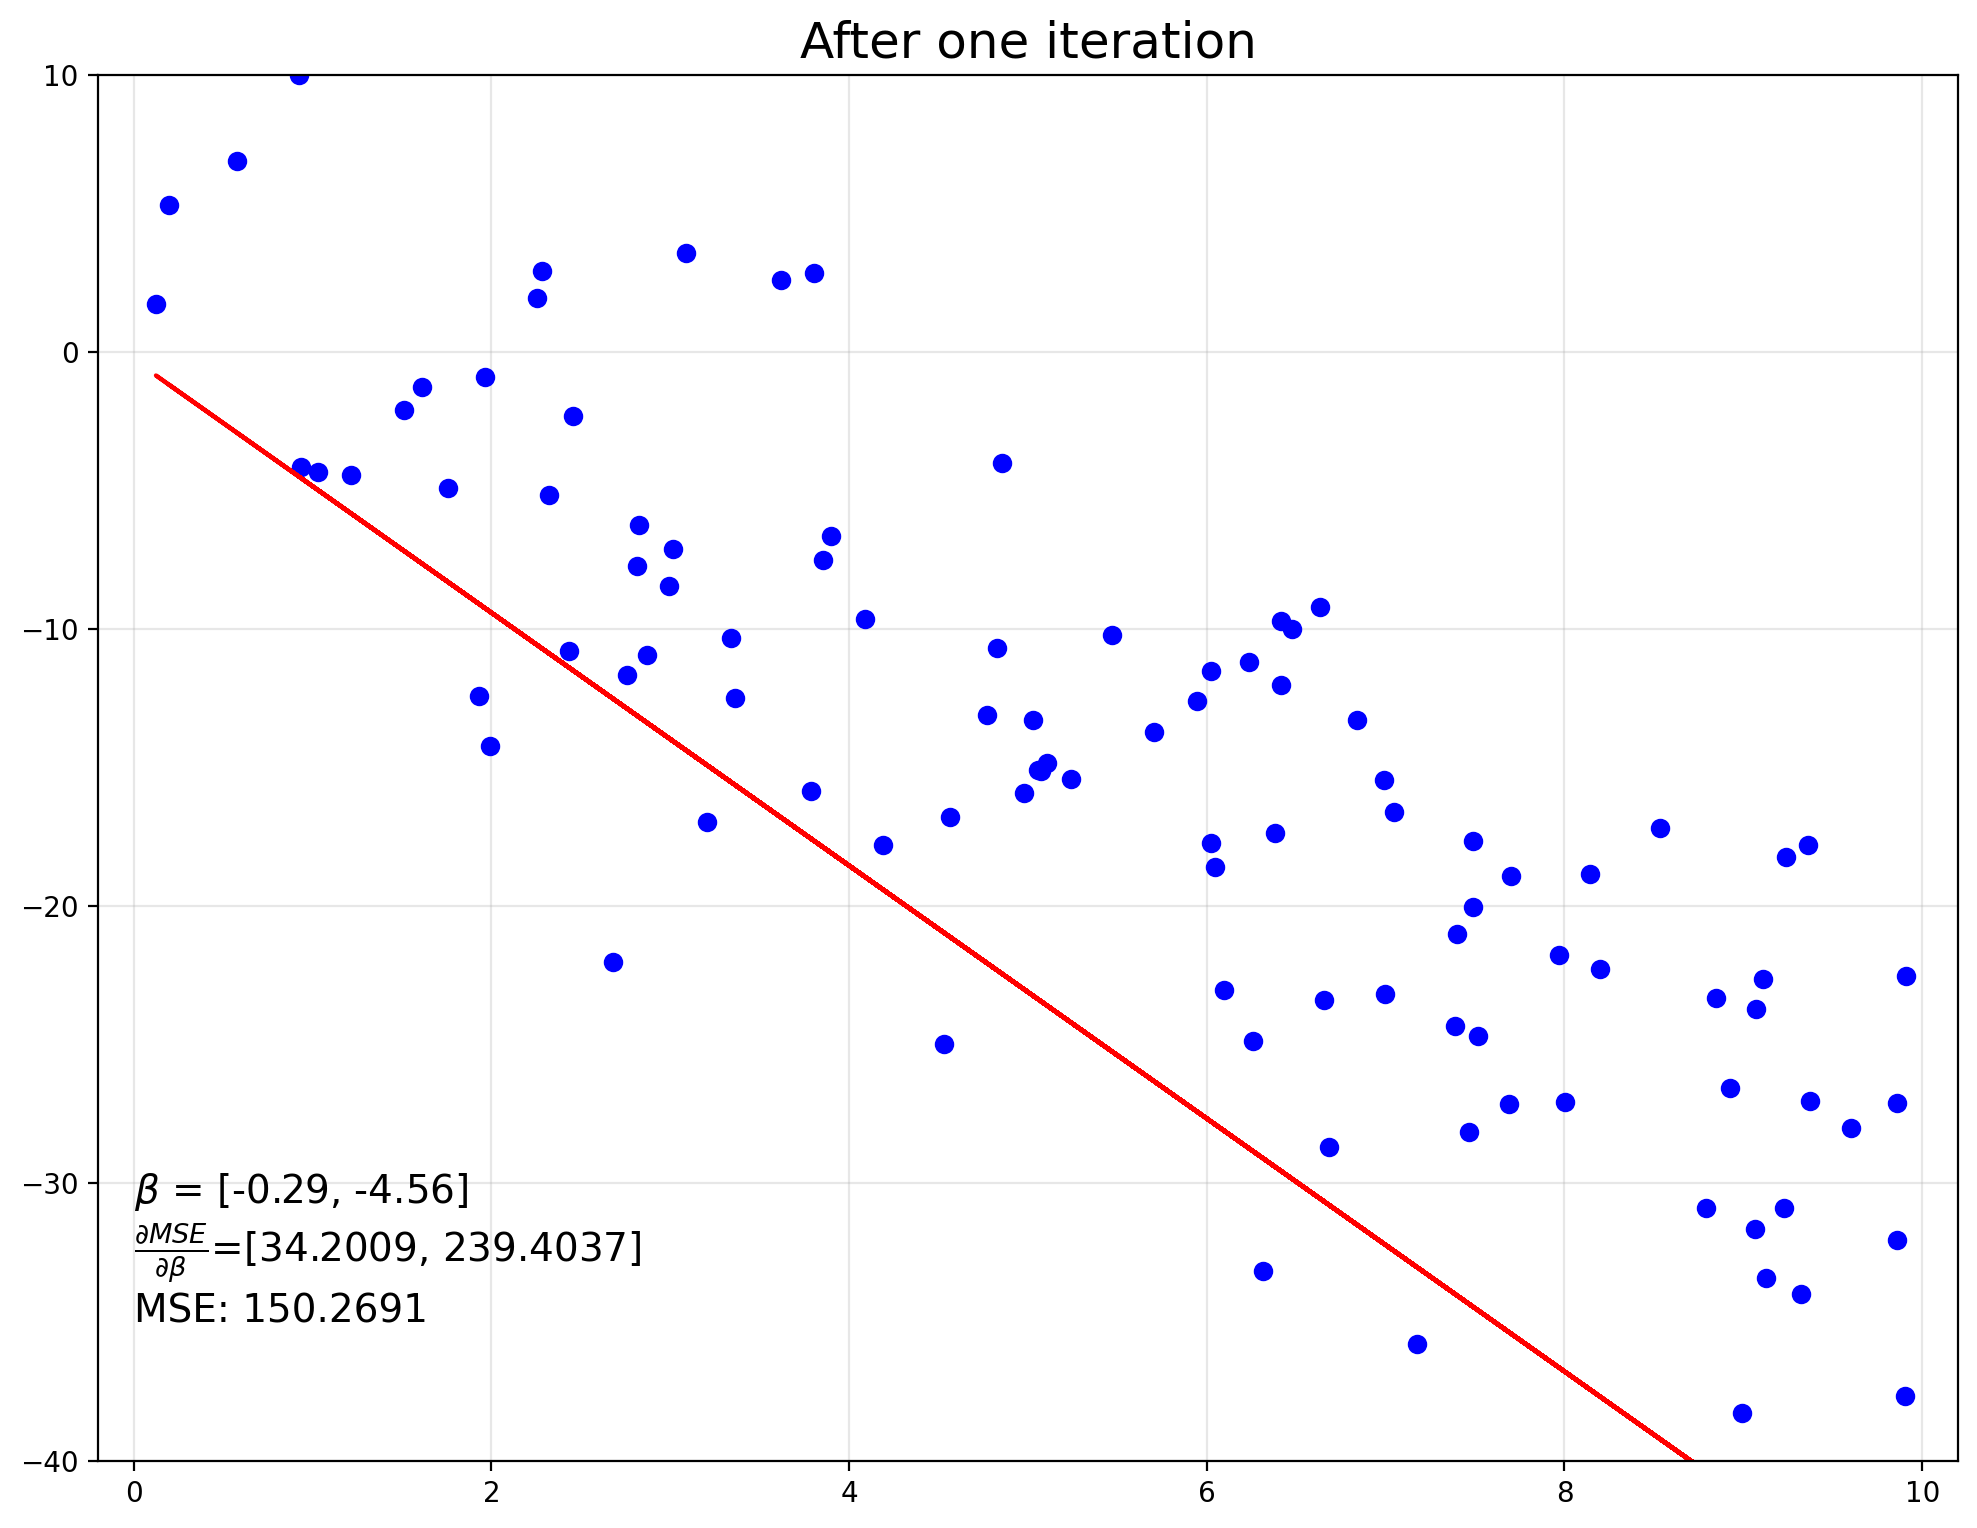

In [24]:
η = 0.02  # learning rate

# update β
β = β - η*gradient

# calculate new predicted Y values
y_hat = X @ β

do_plot('After one iteration')

Here's an animation of the first 200 steps in the iteration:

```{raw} html
:file: regression_animation.html
```

We can keep iterating until we reach some reasonable *stopping point*. One reasonable strategy is to stop when gradient is very small, meaning that the change between the current value of $\beta$ and what it would be in the next iteration is very small. In other words, the estimate has *converged*.

Iter      0: [0], [0]
Iter    100: [1.01677665], [-3.03221436]
Iter    200: [1.679105], [-3.1293367]
Iter    300: [1.98573382], [-3.17430007]
Iter    400: [2.12768944], [-3.19511612]
Iter    500: [2.19340864], [-3.20475304]
Iter    600: [2.22383373], [-3.2092145]
Iter    700: [2.2379192], [-3.21127997]
Iter    800: [2.24444016], [-3.21223618]
Iter    900: [2.24745907], [-3.21267887]
Iter   1000: [2.2488567], [-3.21288381]
Iter   1100: [2.24950373], [-3.21297869]
Stopped after 1199 iterations


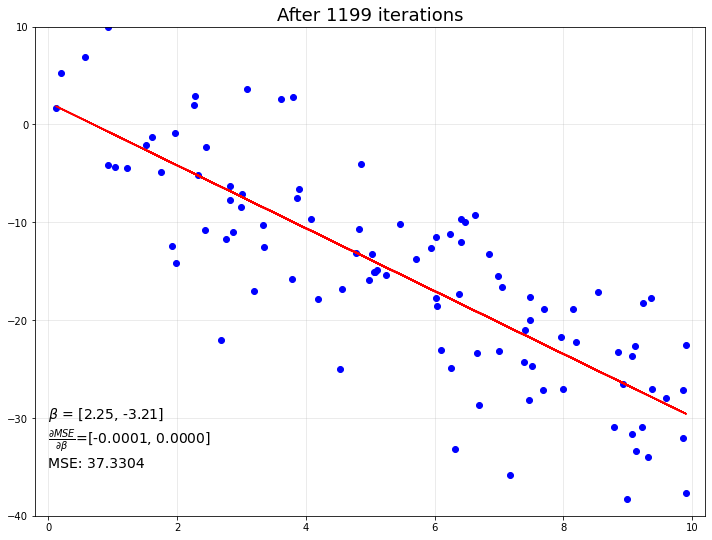

In [23]:
n_iterations = 2500

β = np.array([[0],[0]])  # initialize to (0,0)

for i in range(n_iterations):
    if i % 100 == 0: print('Iter {:>6}: {}, {}'.format(i, *β))
    gradient = -2/N * X.T @ (y - X@β)
    β = β - η*gradient
    if abs(gradient).max()<0.0001: break

print(f'Stopped after {i} iterations')

y_hat = X @ β

do_plot(f'After {i} iterations')

```{admonition} Check your understanding
:class: tip
What happens when we make the learning rate $\eta$ bigger or smaller? Experiment and see!
```

A similar iterative technique is used by off-the-shelf optimizers, like the one in `scipy`. It finds precisely the same answer we found using our iterative technique; the solution is given in the `x` value of the result.

In [24]:
from scipy.optimize import minimize

minimize(MSE,       # function to minimize
         x0=[0,0]   # initial values for function arguments
         )

      fun: 37.33043171791398
 hess_inv: array([[ 2.55334903, -0.37199072],
       [-0.37199072,  0.06742381]])
      jac: array([4.76837158e-07, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([ 2.25006285, -3.21306069])

## Analytical solution

We can also find an *analytical solution* to the problem of minimizing MSE. Setting the gradient equal to zero, we have

$$\frac{2}{N} X'(X\hat\beta-y) = 0.$$

This implies the *normal equation*

$$X'X\hat{\beta} = X'y,$$

which must hold for the function to be minimized. As long as $X'X$ is invertible, this has the solution

$$\hat{\beta} = (X'X)^{-1}X'y.$$

$X'X$ is invertible when $K<N$, but even if it is theoretically invertible it may be computationally quite difficult if $K$ is large.

In [25]:
XpX = X.T @ X

XpX

array([[ 100.        ,  551.1599446 ],
       [ 551.1599446 , 3777.82863606]])

Notice that $X'X$ encodes various sums calculated from the data, namely the values of $N$, $\sum x$ and $\sum x^2$. It is a square matrix with dimension $K\times K$.

In [26]:
# Sum of each column
X.sum(axis=0)

array([100.       , 551.1599446])

In [27]:
# Sum of squares
(X[:,1]**2).sum()

3777.828636059256

We can calculate the coefficients using this equation for $\hat{\beta}$. It should not surprise you that these are  exactly what the iterative algorithm found.

In [28]:
from numpy.linalg import inv

beta = inv(X.T @ X) @ X.T @ y

beta

array([[ 2.25006151],
       [-3.21306049]])

### Regression with a single regressor

In the simplest case with $K=2$ — that is, one intercept and one regressor — we have

$$X = \begin{pmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_n \\
\end{pmatrix}$$

so

$$X'X = \begin{pmatrix}
n & \sum x\\ 
\sum x & \sum x^2
\end{pmatrix}
\quad
\text{and}
\quad
X'Y = \begin{pmatrix}
\sum y\\ 
\sum xy
\end{pmatrix}.$$




Therefore,

$$
\hat{\beta} = (X'X)^{-1}X'Y =
\begin{pmatrix}
n & \sum x\\ 
\sum x & \sum x^2
\end{pmatrix}^{-1}
\begin{pmatrix}
\sum y\\ 
\sum xy
\end{pmatrix}.
$$

Using the formula for the inverse of a $2\times 2$ matrix, we have

$$
\begin{align*}
\begin{pmatrix}
n & \sum x\\ 
\sum x & \sum x^2
\end{pmatrix}^{-1}
& = \frac{1}{n\sum x^2 - \left(\sum{x}\right)^2}
\begin{pmatrix}
\sum x^2 & -\sum x\\ 
-\sum x & n
\end{pmatrix} \\
& = \frac{1}{n\sum(x-\bar x)^2}
\begin{pmatrix}
\sum x^2 & -\sum x\\ 
-\sum x & n
\end{pmatrix},
\end{align*}
$$

where we have used the fact that 

$$
n\sum x^2 - \left(\sum x\right)^2 = n\sum(x-\bar x)^2.
$$(ss)

Therefore,

\begin{align*}
\hat{\beta} &= \frac{1}{n\sum(x-\bar{x})^2}
\begin{pmatrix}
\sum x^2 & -\sum x\\ 
-\sum x & n
\end{pmatrix}
\begin{pmatrix}
\sum y\\ 
\sum xy
\end{pmatrix} \\
&= \frac{1}{n\sum(x-\bar{x})^2}
\begin{pmatrix}
\sum y \sum x^2 - \sum x \sum xy\\ 
n \sum xy - \sum x \sum y
\end{pmatrix}.
\end{align*}

Similar to equation {eq}`ss` above, we can also show that

$$n\sum xy - \left(\sum x\right)\left(\sum y\right) = n\sum(y-\bar y)(x-\bar x).$$(ss2)

:::{admonition} Exercise

Prove equation {eq}`ss2`. Start with the expression on the right-hand side of the equation and show that it equals the the expression on the left.

:::

:::{admonition} Solution
:class: admonition-solution, dropdown

$$
\begin{aligned}
n \sum(x-\bar{x})(y-\bar{y}) &= n \sum(x y-x \bar{y}-\bar{x} y+\bar{x} \bar{y}) \\
&= n \sum x y-n \bar{y} \sum x-n \bar{x} \sum y+n \sum \bar{x} \bar{y} \\
&= n \sum x y-\sum y \sum x-\sum x \sum y+n \bar{x} \bar{y} \sum 1 \\
&= n \sum x y-2 \sum x \sum y+n^{2} \bar{x} \bar{y} \\
&= n \sum x y-\sum x \sum y
\end{aligned}
$$

:::

Looking at the value for second coefficient,

\begin{equation*}
\hat{\beta}_1 = \frac{n \sum xy - \sum x \sum y}{n\sum(x-\bar{x})^2}
= \frac{\sum(y_i-\bar{y})(x_i-\bar{x})}{\sum (x_i-\bar{x})^2}
= \frac{\cov(x,y)}{\var(x)}.
\end{equation*}

Solving for the first coefficient requires some additional tedious alebra, but we end up with

$$\hat{\beta}_0 = \frac{\sum y \sum x^2 - \sum x \sum xy}{n\sum(x-\bar{x})^2} = \bar{y} - \hat{\beta}_1 \bar{x}.$$

That is, the value of $\hat\beta_0$ is chosen to make the the average of $y_i$ equal to the predicted value of the average $x_i$. In other words, it's chosen to force the average error to be zero.

## Sum of squares

The figure below shows the residual for each observation in the data, given the optimal $\hat\beta$ estimate.

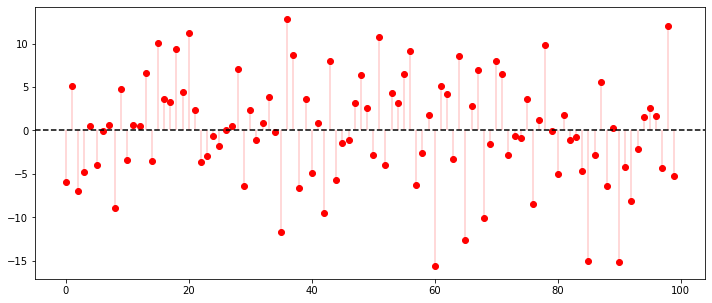

In [29]:
y_hat = X @ beta
ε_hat = y - y_hat

fig, ax = plt.subplots(figsize=(12,5))
ax.scatter(np.arange(N), ε_hat, color='r')
ax.vlines(np.arange(N), 0, ε_hat, lw=0.3, color='r')
ax.axhline(0, ls='--', c='k')
plt.show()

The Total Sum of Squares in the data is the sum of squared deviations from the mean,

$$TSS := \sum_i (y_i-\bar{y})^2 = (y-\bar{y})'(y-\bar{y}).$$

In [30]:
TSS = ((y-y.mean())**2).sum()
TSS

11373.199830388872

The Residual Sum of Squares is the sum of squared errors,

$$RSS := \sum_i (y_i - \hat{y}_i) = (y-\hat{y})'(y-\hat{y}) = \hat\epsilon'\hat\epsilon.$$

The average of RSS provides an estimate of the variance of the noise, $\sigma^2$:

$$\hat\sigma^2 = \frac{RSS}{N-K}.$$

We use the Total Sum of Squares and the Residual Sum of Squares to calculate $R^2$, a measure of how much of the variation in the data our model can explain:

$$R^2 := \frac{TSS - RSS}{TSS} = 1- \frac{RSS}{TSS}.$$

```{margin}
Some numpy calculations give a scalar result that is stored as a 1$\times$1 array. We can convert these to a `float` using the `.item()` method, as seen here in the calcuation of `RSS`.
```

In [31]:
RSS = (ε_hat.T @ ε_hat).item()

1 - RSS/TSS

0.6717684356677902

We are able to explain about {glue:}`Rsq`% of the variance of $Y$ with our model.